### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ №2

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Гусейнов Вахид Азерович
##### Группа:   НБИбд-01-17

## Москва 2020
***

### Вариант № 20

20 Yeast Data Set

Название файла: yeast.data

Ссылка: http://archive.ics.uci.edu/ml/datasets/Yeast

http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data

1. Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data'
data = pd.read_csv(url, header=None, prefix='V', delim_whitespace=True)
data.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


2. Проведите исследование набора данных, выявляя числовые признаки. Если какие-то из числовых признаков были неправильно классифицированы, то преобразуйте их в числовые. Если в наборе для числовых признаков присутствуют пропущенные значения ('?'), то заполните их медианными значениями.

In [3]:
(data == '?').sum()

V0    0
V1    0
V2    0
V3    0
V4    0
V5    0
V6    0
V7    0
V8    0
V9    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1484 non-null   object 
 1   V1      1484 non-null   float64
 2   V2      1484 non-null   float64
 3   V3      1484 non-null   float64
 4   V4      1484 non-null   float64
 5   V5      1484 non-null   float64
 6   V6      1484 non-null   float64
 7   V7      1484 non-null   float64
 8   V8      1484 non-null   float64
 9   V9      1484 non-null   object 
dtypes: float64(8), object(2)
memory usage: 116.1+ KB


3. Определите признак, содержащий метку класса. Если признак, содержащий метку класса, принимает более 10 различных значений, то выполните

Это признак V9

In [5]:
print('Количество уникальных значений V9:', data['V9'].nunique())

Количество уникальных значений V9: 10


Дискритезация не нужна

4. Определите числовой признак, имеющий максимальную дисперсию. Исследуйте, принимает ли это признак дискретные или непрерывные значения.

In [6]:
data.var()

V1    0.018851
V2    0.015357
V3    0.007512
V4    0.018796
V5    0.002338
V6    0.005728
V7    0.003340
V8    0.011340
dtype: float64

Наибольшая дисперсия у V1

In [7]:
data['V1'].value_counts()

0.45    54
0.47    53
0.46    53
0.49    52
0.50    50
        ..
0.17     1
0.94     1
0.95     1
1.00     1
0.90     1
Name: V1, Length: 81, dtype: int64

Принимает непрерывные значения.

5. При помощи класса SelectKBest библиотеки scikit-learn найдите два признака, имеющих наиболее выраженную взаимосвязь с признаком, имеющим максимальную дисперсию.

In [8]:
from sklearn.feature_selection import SelectKBest, f_regression

X = data.drop(columns=['V0', 'V9', 'V1'])
y = data['V1']

k_best = SelectKBest(score_func=f_regression, k=2)
fit = k_best.fit(X, y)

print("\nОценки признаков:\n")
for col, score in zip(X.columns, fit.scores_):
    print(f'{col} : {score}')


cols = k_best.get_support(indices=True)
print("\nОтобранные признаки:\n", X.iloc[:, cols].head())


Оценки признаков:

V2 : 757.669100745501
V3 : 40.93657899054837
V4 : 38.03036917212486
V5 : 6.272781064321212
V6 : 0.04642674437676052
V7 : 8.393005859012185
V8 : 23.34841642214857

Отобранные признаки:
      V2    V3
0  0.61  0.47
1  0.67  0.48
2  0.62  0.49
3  0.44  0.57
4  0.44  0.48


6. Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими найденным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

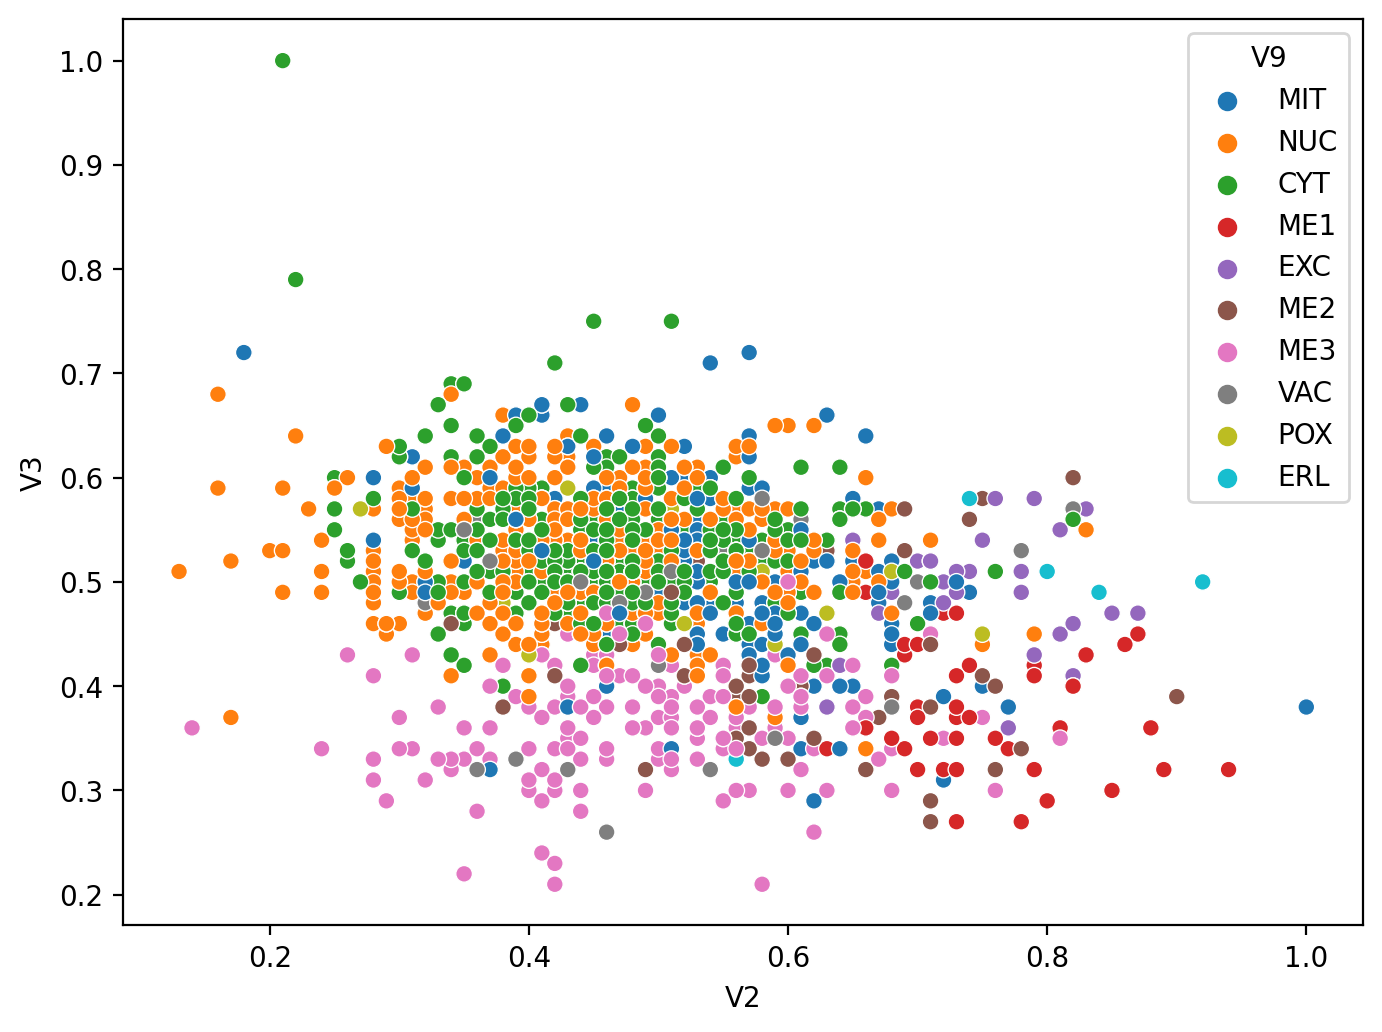

In [9]:
plt.figure( figsize=(8, 6), dpi=200 )
sns.scatterplot(x=data['V2'], y=data['V3'], hue=data['V9']);

7. Оставляя в наборе данных только числовые признаки, найдите и выведите на экран размерность метода главных компонент (параметр n_components), для которой доля объясняемой дисперсии будет не менее 99%.

In [10]:
from sklearn.decomposition import PCA 

X = data.drop(columns=['V0', 'V9'])

for r in range(1, X.shape[1]+1):
    pca = PCA(n_components=r)
    pca.fit(X)
    print(f"r = {r}\tДисперсия = {sum(pca.explained_variance_ratio_)*100}%")

r = 1	Дисперсия = 35.25756426597257%
r = 2	Дисперсия = 56.58107810866593%
r = 3	Дисперсия = 70.01740011480557%
r = 4	Дисперсия = 79.44631165351734%
r = 5	Дисперсия = 86.6569728540997%
r = 6	Дисперсия = 93.522722637425%
r = 7	Дисперсия = 97.22596514856278%
r = 8	Дисперсия = 100.0%


Только для 8 компонент доля объясняемой дисперсии больше 99%

То есть удаление любой компоненты уменьшает долю объяняемой дисперсии до значения меньшее 99%

8. Пользуясь методом главных компонент, снизьте размерность набора данных до двух признаков и изобразите полученный набор данных в виде точек на плоскости, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

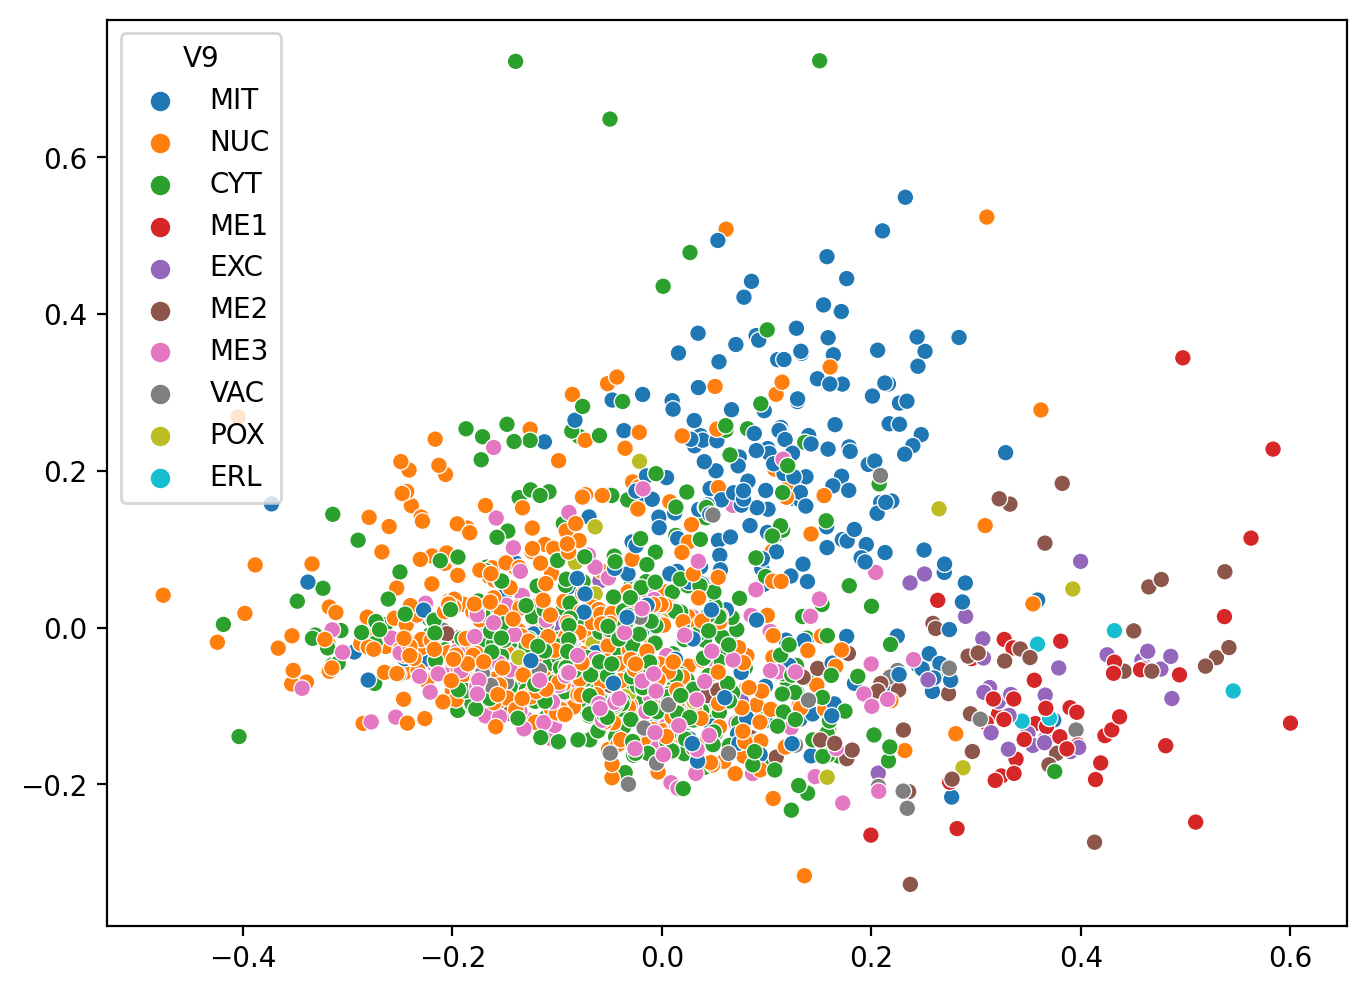

In [11]:
pca = PCA(n_components=2)
pcad = pca.fit_transform(X)

plt.figure(figsize=(8, 6), dpi=200)
sns.scatterplot(x=pcad[:, 0], y=pcad[:, 1], hue=data['V9']);